# <center> Jeodyshan Obra </center>

# <center> IS362 Assignment 8 </center>

#### Installing Seaborn

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

##### Load Auto-MPG data set into pandas DataFrame and labeled the column headers

In [14]:
auto_column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car name']
auto_df = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header= None, names= auto_column_names)
column = auto_df.columns.tolist()
column = column[-1:] + column[:-1]
auto_df = auto_df[column]
auto_df.head()

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1


##### Show the columns names of the DataFrame to confirm:

In [15]:
auto_df.columns

Index(['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin'],
      dtype='object')

##### Show a summary of data aggregation: 

In [16]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


##### Horsepower data is marked with '?' This replaces the the '?'

In [17]:
auto_df = auto_df.replace(to_replace='?', value=np.nan)

##### Converting the column into a numeric 

In [18]:
auto_df[['horsepower']] = auto_df[['horsepower']].apply(pd.to_numeric)

auto_df.dtypes

car name         object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model             int64
origin            int64
dtype: object

##### Converting origin values to 'USA', 'Asia', 'Europe'

In [19]:
auto_df['origin'].replace(1, 'USA', inplace=True)
auto_df['origin'].replace(2, 'ASIA', inplace=True)
auto_df['origin'].replace(3, 'EUROPE', inplace=True)

auto_df.head()

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,USA


##### Creating a bar chart that shows the distribution of cylinders 

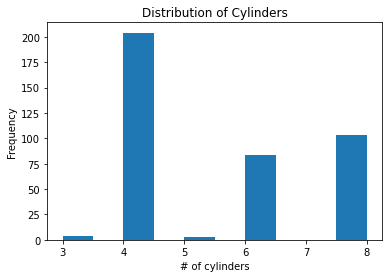

In [20]:
auto_df.groupby("cylinders")
auto_df['cylinders'].plot(kind='hist', title="Distribution of Cylinders")
plt.xlabel('# of cylinders')
plt.show()

##### Relationship between Horsepower & Weight

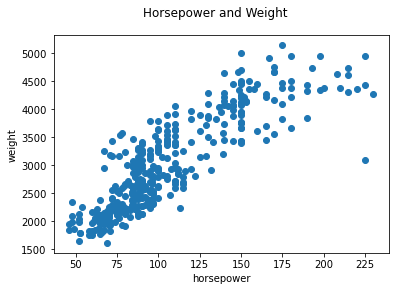

In [21]:
plt.scatter(auto_df['horsepower'], auto_df['weight'])
plt.suptitle('Horsepower and Weight')
plt.xlabel('horsepower')
plt.ylabel('weight')
plt.show()

##### What is the relationship bettwen horsepower and acceleration in the chart below?

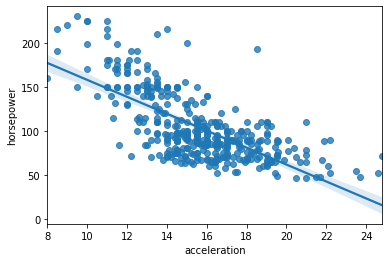

In [30]:
weight_horsepower = sb.regplot(x ='acceleration', y = 'horsepower', data = auto_df)
weight_horsepower.set(xlabel='acceleration', ylabel='horsepower')
plt.show()

##### Based on the chart most of the plots are within the middle of the chart. This means the relationship between both the horsepower and acceleration of a car is fairly similar to one another. 